In [7]:
import numpy as np
np.random.seed(1337)  # for reproducibility

import keras
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

Inference in Keras is rather simple. One just calls the `predict` method of the loaded model.

In [2]:
model = keras.models.load_model('example_keras_mnist_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                73792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
__________

Loading the dataset and looking at the first five samples of the test data.

In [5]:
dataset = mnist.load_data()
train_data = dataset[0][0] / 255
train_data = train_data[..., np.newaxis].astype('float32')
train_labels = np_utils.to_categorical(dataset[0][1]).astype('float32')
test_data = dataset[1][0] / 255
test_data = test_data[..., np.newaxis].astype('float32')
test_labels = np_utils.to_categorical(dataset[1][1]).astype('float32')
test_data.shape

(10000, 28, 28, 1)

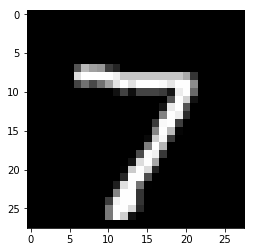

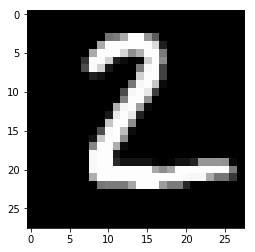

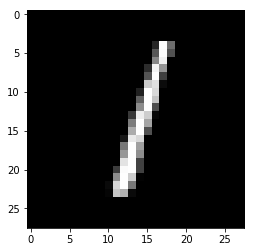

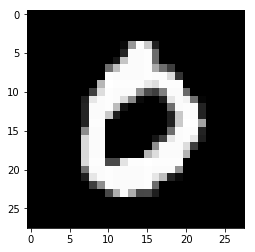

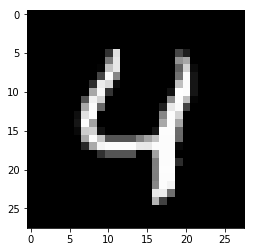

In [10]:
for i in range(5):
    plt.imshow(test_data[i, ..., 0])
    plt.show()

Doing the inference

In [11]:
softmax_predictions = model.predict(test_data[:5])
softmax_predictions

array([[  1.37134705e-12,   1.86429872e-07,   4.48604296e-05,
          2.75211678e-05,   2.32902185e-13,   2.64756134e-10,
          2.25069486e-19,   9.99927402e-01,   3.58777319e-09,
          2.75814260e-10],
       [  6.08821858e-13,   3.14790114e-08,   1.00000000e+00,
          2.10176877e-14,   3.89731040e-15,   1.44422285e-14,
          4.63614498e-13,   5.64310274e-12,   2.40752269e-13,
          7.10694034e-21],
       [  3.53167801e-10,   9.99998450e-01,   1.37012819e-06,
          2.74349581e-13,   1.56569769e-07,   2.49775873e-12,
          1.95110061e-09,   3.00536520e-08,   2.35072317e-08,
          2.10181980e-12],
       [  9.99990702e-01,   2.47609766e-10,   8.57199467e-08,
          3.26125559e-07,   3.01708569e-09,   6.44482512e-08,
          1.35530513e-06,   1.73851600e-08,   2.15996483e-08,
          7.51287189e-06],
       [  4.73962368e-15,   3.96736255e-11,   1.74442356e-13,
          1.78477981e-17,   1.00000000e+00,   4.41656379e-17,
          1.84405171e-15

In [12]:
predictions = np.argmax(softmax_predictions, axis=-1)
predictions

array([7, 2, 1, 0, 4])

In [15]:
predictions == np.argmax(test_labels[:5], axis=1)

array([ True,  True,  True,  True,  True], dtype=bool)